In [1]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")


import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset
data_BM = pd.read_csv('bigmart_data.csv')
# drop the null values
data_BM = data_BM.dropna(how="any")
# multiply Item_Visibility by 100 to increase size
data_BM["Visibility_Scaled"] = data_BM["Item_Visibility"] * 100
# view the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Scaled
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.000000


<AxesSubplot:xlabel='Item_Outlet_Sales'>

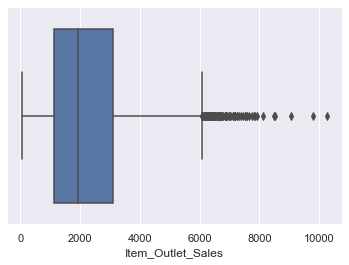

In [3]:
sns.boxplot(data_BM['Item_Outlet_Sales'], orient='vertical')

In [4]:
# Find Q1,Q3,Median, IQR, Upper_Fence, LowerFence
# Perform capping on this column!

In [6]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_BM['Item_Outlet_Sales'].quantile(0.25)
Q3 = data_BM['Item_Outlet_Sales'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the Median
Median = data_BM['Item_Outlet_Sales'].median()

# Calculate the Upper and Lower fences for outliers (using 1.5*IQR rule for outliers)
Upper_Fence = Q3 + 1.5 * IQR
Lower_Fence = Q1 - 1.5 * IQR

In [7]:
# Print these statistics
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Median: {Median}')
print(f'Upper Fence: {Upper_Fence}')
print(f'Lower Fence: {Lower_Fence}')

# Perform capping
data_BM['Item_Outlet_Sales'] = np.where(data_BM['Item_Outlet_Sales'] > Upper_Fence, Upper_Fence, 
                            (np.where(data_BM['Item_Outlet_Sales'] < Lower_Fence, 
                                      Lower_Fence, data_BM['Item_Outlet_Sales'])))

Q1: 1125.202
Q3: 3111.6163
IQR: 1986.4143000000001
Median: 1939.8083000000001
Upper Fence: 6091.23775
Lower Fence: -1854.41945


<AxesSubplot:xlabel='Item_Outlet_Sales'>

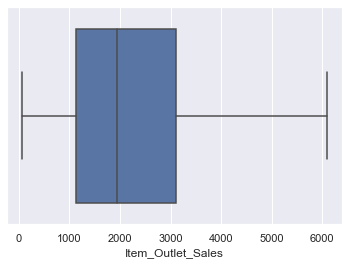

In [8]:
sns.boxplot(data_BM['Item_Outlet_Sales'], orient='vertical')

In [ ]:
# 20 columns

In [17]:
corr = data_BM.corr()

In [18]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Visibility_Scaled
Item_Weight,1.000000,-0.010229,0.033330,-0.010596,0.011529,-0.010229
Item_Visibility,-0.010229,1.000000,-0.007292,0.009324,-0.008655,1.000000
Item_MRP,0.033330,-0.007292,1.000000,0.004105,0.686533,-0.007292
Outlet_Establishment_Year,-0.010596,0.009324,0.004105,1.000000,-0.039302,0.009324
Item_Outlet_Sales,0.011529,-0.008655,0.686533,-0.039302,1.000000,-0.008655
Visibility_Scaled,-0.010229,1.000000,-0.007292,0.009324,-0.008655,1.000000


In [ ]:
# heatmap!

<AxesSubplot:>

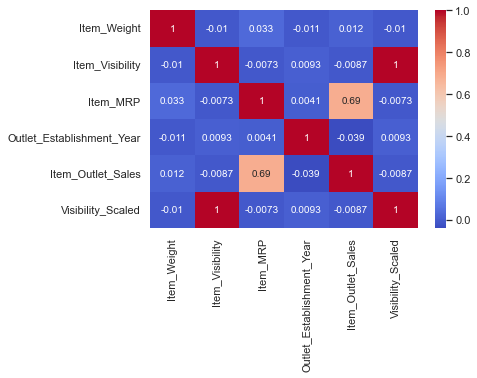

In [23]:
sns.heatmap(corr, annot = True,cmap = 'coolwarm')